In [ ]:
!pip install mne
import mne
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers
from tensorflow.keras import utils as np_utils
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Permute, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import SeparableConv2D, DepthwiseConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file='/content/drive/MyDrive/BCICIV_2a_gdf/A09T.gdf'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

raw=mne.io.read_raw_gdf(file, preload=True, stim_channel='auto', verbose=False)
# Filter settings
low_cut = 4
hi_cut  = 40

raw_filt = raw.copy().filter(low_cut, hi_cut)
#raw.filter(4,40.,fir_design='firwin')
#raw.plot_psd(area_mode='range', tmax=10.0,average=False)
rawdata = raw_filt.get_data()
print(rawdata.shape)
events, event_id = mne.events_from_annotations(raw_filt)
print(events.shape[0])
allLeftData = []
allRightData = []
allFootData = []
allTongueData = []
for i in range(events.shape[0]-1):
  if(events[i,2] == 7):
    leftData = rawdata[:,events[i,0]+125:events[i,0]+1125] 
    allLeftData.append(leftData)
  if(events[i,2] == 8):
    rightData = rawdata[:,events[i,0]+125:events[i,0]+1125]
    allRightData.append(rightData)
  if(events[i,2] == 9):
    footData = rawdata[:,events[i,0]+125:events[i,0]+1125]
    allFootData.append(footData)
  if(events[i,2] == 10):
    tongueData = rawdata[:,events[i,0]+125:events[i,0]+1125]
    allTongueData.append(tongueData)
print(len(allLeftData))
print(len(allRightData))
print(len(allFootData))
print(len(allTongueData))
allLeftData = np.array(allLeftData) # creates an array 
allRightData = np.array(allRightData)
allFootData = np.array(allFootData)
allTongueData = np.array(allTongueData)
allLeftData = allLeftData[:71,:22,:] #creating a matrix with 71 rows, 22 columns and 600 depth. 600 is the window size 
allRightData = allRightData[:71,:22,:]
allFootData = allFootData[:71,:22,:]
allTongueData = allTongueData[:71,:22,:]
print(allLeftData.shape)
print(allRightData.shape)
print(allFootData.shape)
print(allTongueData.shape)

def standardlizeSig(data):
  base = np.mean(data)
  std = np.std(data)
  standardlized_data = (data-base)/std
  del base, std
  return standardlized_data
# def standardlizeSig(data):
#   minft = data.min()
#   maxft = data.max()
#   standardlized_data= ((data - minft)/(maxft - minft))
#   return standardlized_data

allLeftDataTF = []
allRightDataTF = []
allFootDataTF = []
allTongueDataTF = []
for i in range (allLeftData.shape[0]):
  allLeftDataTF.append(standardlizeSig(allLeftData[i,:,:]))
  allRightDataTF.append(standardlizeSig(allRightData[i,:,:]))
  allFootDataTF.append(standardlizeSig(allFootData[i,:,:]))
  allTongueDataTF.append(standardlizeSig(allTongueData[i,:,:]))
allLeftDataTF = np.array(allLeftDataTF) # creates an array 
allRightDataTF = np.array(allRightDataTF)
allFootDataTF = np.array(allFootDataTF)
allTongueDataTF = np.array(allTongueDataTF)

trainleftLabels = [0] * allLeftDataTF.shape[0]
trainrightLabels = [1] * allRightDataTF.shape[0]
trainfootLabels = [2] * allFootDataTF.shape[0]
traintongueLabels = [3] * allTongueDataTF.shape[0]
allTrainLabels = trainleftLabels + trainrightLabels + trainfootLabels + traintongueLabels
allTrainLabels = np.array(allTrainLabels)
allTrainData = np.concatenate((allTongueDataTF, allLeftDataTF, allRightDataTF, allFootDataTF))
X_train, X_rem, Y_train, Y_rem = train_test_split(allTrainData, allTrainLabels, test_size=0.4, random_state=42)
X_validate,X_test,Y_validate,Y_test  = train_test_split(X_rem, Y_rem, test_size=0.1,random_state=42)
print (X_train.shape,X_validate.shape,X_test.shape)


/usr/local/lib/python3.7/dist-packages/mne/io/edf/edf.py:1155: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, UINT8).tolist()[0]
/usr/lib/python3.7/contextlib.py:119: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 413 samples (1.652 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


(25, 673328)
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.6s finished


639
72
72
71
72
(71, 22, 1000)
(71, 22, 1000)
(71, 22, 1000)
(71, 22, 1000)
(170, 22, 1000) (102, 22, 1000) (12, 22, 1000)


In [ ]:
mu=0.0
std =0.5 # for %5 Gaussian noise
def gaussian_noise(x,mu,std):
    noise = np.random.normal(mu, std, size = x.shape)
    x_noisy = x + noise
    return x_noisy 

TrainData_temp=[]
TrainData_temp_label=[]
for i in range(X_train.shape[0]):
  #random_trial=np.random.randint(0,X_train.shape[0])
  NoisyData=gaussian_noise(X_train[i],mu,std)
  TrainData_temp.append(NoisyData)
  TrainData_temp_label.append(Y_train[i])


TrainData_temp=np.array(TrainData_temp)
TrainData_temp_label=np.array(TrainData_temp_label)
print(TrainData_temp.shape,TrainData_temp_label)


TrainData=np.concatenate((X_train,TrainData_temp))
TrainLabel=np.concatenate((Y_train,TrainData_temp_label))
print(TrainLabel.shape, TrainData.shape)



(170, 22, 1000) [1 1 1 2 2 1 1 2 3 3 1 3 1 2 0 3 3 1 2 2 3 3 2 0 3 1 2 0 0 0 2 3 2 0 1 2 2
 0 3 2 1 0 3 1 2 0 3 1 3 3 1 0 0 2 2 2 2 0 3 3 0 2 0 1 0 2 2 2 3 1 0 1 1 3
 3 0 3 0 0 2 2 0 1 3 2 0 3 3 1 0 2 2 0 0 1 3 3 2 2 0 2 2 3 0 1 0 1 0 3 1 0
 2 1 2 0 3 0 2 2 3 1 1 1 1 0 1 0 0 0 1 1 0 2 1 3 1 3 3 3 3 0 3 0 0 2 2 2 2
 0 0 3 3 0 2 2 3 2 1 2 1 1 3 1 3 0 2 1 1 3 1]
(340,) (340, 22, 1000)


In [ ]:
kernels, chans, samples = 1, 22, TrainData.shape[2]
TrainData1      = TrainData.reshape(TrainData.shape[0], chans, samples, kernels)
ValidData1  = X_validate.reshape(X_validate.shape[0], chans, samples, kernels)
TestData1  = X_test.reshape(X_test.shape[0], chans, samples, kernels)
TrainLabel1     = np_utils.to_categorical(TrainLabel)
ValidLabel1  = np_utils.to_categorical(Y_validate)
TestLabel1  = np_utils.to_categorical(Y_test)


In [ ]:

def EEGNet(nb_classes, Chans = 64, Samples = 128, 
             dropoutRate = 0.5, kernLength = 64, F1 = 8, 
             D = 2, F2 = 16, norm_rate = 0.25, dropoutType = 'Dropout'):
    """ Keras Implementation of EEGNet
    http://iopscience.iop.org/article/10.1088/1741-2552/aace8c/meta
    Note that this implements the newest version of EEGNet and NOT the earlier
    version (version v1 and v2 on arxiv). We strongly recommend using this
    architecture as it performs much better and has nicer properties than
    our earlier version. For example:
        
        1. Depthwise Convolutions to learn spatial filters within a 
        temporal convolution. The use of the depth_multiplier option maps 
        exactly to the number of spatial filters learned within a temporal
        filter. This matches the setup of algorithms like FBCSP which learn 
        spatial filters within each filter in a filter-bank. This also limits 
        the number of free parameters to fit when compared to a fully-connected
        convolution. 
        
        2. Separable Convolutions to learn how to optimally combine spatial
        filters across temporal bands. Separable Convolutions are Depthwise
        Convolutions followed by (1x1) Pointwise Convolutions. 
        
    
    While the original paper used Dropout, we found that SpatialDropout2D 
    sometimes produced slightly better results for classification of ERP 
    signals. However, SpatialDropout2D significantly reduced performance 
    on the Oscillatory dataset (SMR, BCI-IV Dataset 2A). We recommend using
    the default Dropout in most cases.
        
    Assumes the input signal is sampled at 128Hz. If you want to use this model
    for any other sampling rate you will need to modify the lengths of temporal
    kernels and average pooling size in blocks 1 and 2 as needed (double the 
    kernel lengths for double the sampling rate, etc). Note that we haven't 
    tested the model performance with this rule so this may not work well. 
    
    The model with default parameters gives the EEGNet-8,2 model as discussed
    in the paper. This model should do pretty well in general, although it is
	advised to do some model searching to get optimal performance on your
	particular dataset.
    We set F2 = F1 * D (number of input filters = number of output filters) for
    the SeparableConv2D layer. We haven't extensively tested other values of this
    parameter (say, F2 < F1 * D for compressed learning, and F2 > F1 * D for
    overcomplete). We believe the main parameters to focus on are F1 and D. 
    Inputs:
        
      nb_classes      : int, number of classes to classify
      Chans, Samples  : number of channels and time points in the EEG data
      dropoutRate     : dropout fraction
      kernLength      : length of temporal convolution in first layer. We found
                        that setting this to be half the sampling rate worked
                        well in practice. For the SMR dataset in particular
                        since the data was high-passed at 4Hz we used a kernel
                        length of 32.     
      F1, F2          : number of temporal filters (F1) and number of pointwise
                        filters (F2) to learn. Default: F1 = 8, F2 = F1 * D. 
      D               : number of spatial filters to learn within each temporal
                        convolution. Default: D = 2
      dropoutType     : Either SpatialDropout2D or Dropout, passed as a string.
    """
    
    if dropoutType == 'SpatialDropout2D':
        dropoutType = SpatialDropout2D
    elif dropoutType == 'Dropout':
        dropoutType = Dropout
    else:
        raise ValueError('dropoutType must be one of SpatialDropout2D '
                         'or Dropout, passed as a string.')
    
    input1   = Input(shape = (Chans, Samples, 1))

    ##################################################################
    block1       = Conv2D(F1, (1, kernLength), padding = 'same',
                                   input_shape = (Chans, Samples, 1),
                                   use_bias = False)(input1)
    block1       = BatchNormalization()(block1)
    block1       = DepthwiseConv2D((Chans, 1), use_bias = False, 
                                   depth_multiplier = D,
                                   depthwise_constraint = max_norm(1.))(block1)
    block1       = BatchNormalization()(block1)
    block1       = Activation('elu')(block1)
    block1       = AveragePooling2D((1, 8))(block1)
    block1       = dropoutType(dropoutRate)(block1)
    
    block2       = SeparableConv2D(F2, (1, 32),
                                   use_bias = False, padding = 'same')(block1)
    block2       = BatchNormalization()(block2)
    block2       = Activation('elu')(block2)
    block2       = AveragePooling2D((1, 16))(block2)
    block2       = dropoutType(dropoutRate)(block2)
        
    flatten      = Flatten(name = 'flatten')(block2)
    
    dense        = Dense(nb_classes, name = 'dense', 
                         kernel_constraint = max_norm(norm_rate))(flatten)
    softmax      = Activation('softmax', name = 'softmax')(dense)
    
    return Model(inputs=input1, outputs=softmax)

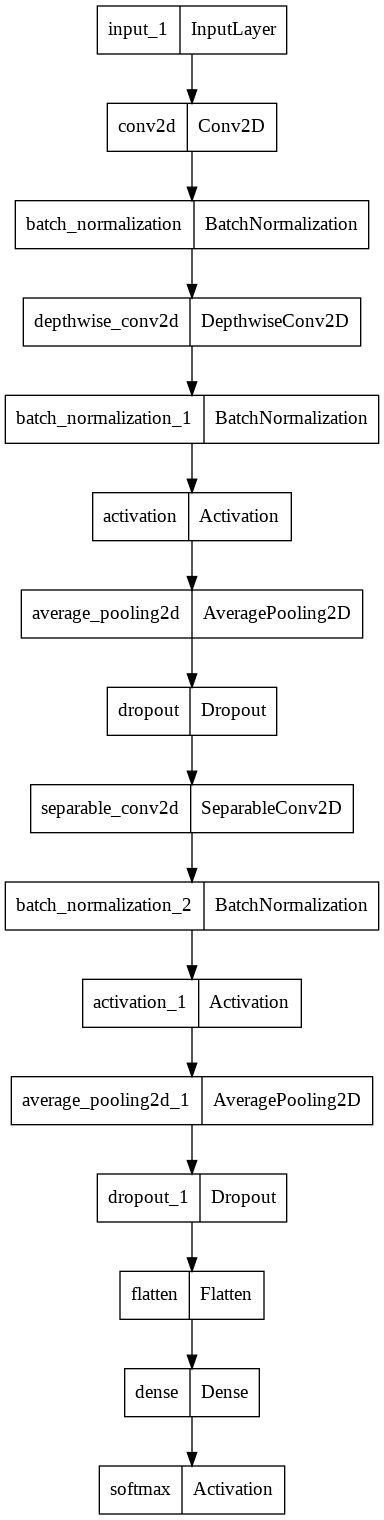

In [ ]:

model=EEGNet(nb_classes=4, Chans = 22, Samples = TrainData.shape[2], 
             dropoutRate = 0.5, kernLength = 125, F1 = 8, 
             D = 2, F2 = 16, norm_rate = 0.25, dropoutType = 'Dropout')
model.compile(loss='categorical_crossentropy', optimizer='Adam', 
              metrics = ['accuracy'])

tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)


In [ ]:

#es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)
fittedModel = model.fit(TrainData1, TrainLabel1, batch_size = 64, epochs = 500, 
                        validation_data=(ValidData1, ValidLabel1))
                       
                        

Epoch 1/500
6/6 [==============================] - 4s 157ms/step - loss: 1.3931 - accuracy: 0.2853 - val_loss: 1.3861 - val_accuracy: 0.2745
Epoch 2/500
6/6 [==============================] - 0s 41ms/step - loss: 1.3855 - accuracy: 0.2971 - val_loss: 1.3861 - val_accuracy: 0.2647
Epoch 3/500
6/6 [==============================] - 0s 34ms/step - loss: 1.3771 - accuracy: 0.2912 - val_loss: 1.3858 - val_accuracy: 0.2647
Epoch 4/500
6/6 [==============================] - 0s 42ms/step - loss: 1.3696 - accuracy: 0.3559 - val_loss: 1.3854 - val_accuracy: 0.2745
Epoch 5/500
6/6 [==============================] - 0s 33ms/step - loss: 1.3626 - accuracy: 0.3235 - val_loss: 1.3849 - val_accuracy: 0.3039
Epoch 6/500
6/6 [==============================] - 0s 35ms/step - loss: 1.3545 - accuracy: 0.3676 - val_loss: 1.3842 - val_accuracy: 0.3333
Epoch 7/500
6/6 [==============================] - 0s 37ms/step - loss: 1.3533 - accuracy: 0.3735 - val_loss: 1.3832 - val_accuracy: 0.3529
Epoch 8/500
6/6 [==

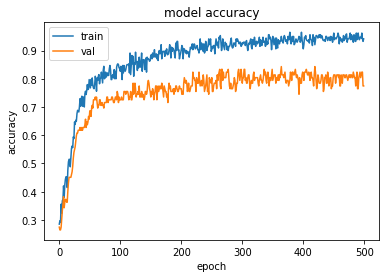

In [ ]:
plt.plot(fittedModel.history['accuracy'])
plt.plot(fittedModel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

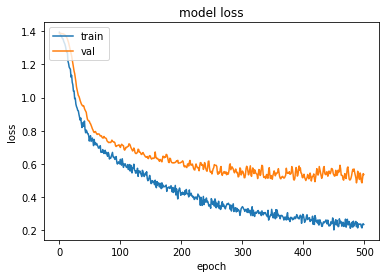

In [ ]:
plt.plot(fittedModel.history['loss'])
plt.plot(fittedModel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(np.mean(fittedModel.history['val_accuracy']))

0.7519607834219932


In [ ]:
model.evaluate(TestData1, TestLabel1)
print(TestData1.shape,TestLabel1.shape)

1/1 [==============================] - 0s 64ms/step - loss: 0.2900 - accuracy: 0.9167
(12, 22, 1000, 1) (12, 4)


In [ ]:
predictions = model.predict(TestData1)
pred_classes = np.argmax(predictions, axis = 1)
actual_classes = np.argmax(TestLabel1, axis = 1)
print(pred_classes, actual_classes)


[0 1 0 0 0 2 0 0 3 3 0 2] [0 1 0 0 0 2 0 0 3 3 0 0]


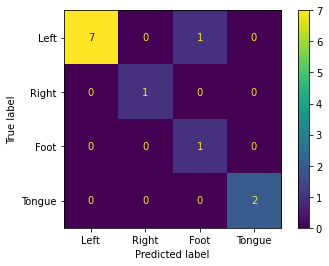

The accuracy is 91.66666666666666 %


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(actual_classes, pred_classes)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Left','Right','Foot','Tongue'])

cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(actual_classes, pred_classes)
print('The accuracy is',Accuracy*100, '%')